In [2]:
import pandas as pd
import numpy as np
import os
import glob
%matplotlib inline

import sys
import os.path as op

from scipy.io import loadmat
import matplotlib.pyplot as plt
import spectralevents as se

In [3]:
files = glob.glob('/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/*_preprocessed_data.csv')

In [4]:
print(files)

['/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0010GP_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0011XQ_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0013LW_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0014VG_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0015TJ_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0016YR_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0017MC_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0019VQ_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory Task Data/Epilepsy/Monitoring/e0020JA_preprocessed_data.csv', '/oscar/data/brainstorm-ws/seeg_data/Memory T

In [5]:
df = pd.read_csv(files[9])

/tmp/ipykernel_3207149/2756443184.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(files[9])


In [6]:
df.head(4)

,Participant_ID,Phase,Condition,Electrode,Error_Position,Error_Color,Time0000,Time0001,Time0002,Time0003,...,Time5110,Time5111,Time5112,Time5113,Time5114,Time5115,Time5116,Time5117,Time5118,Time5119
0,e0022ZG,Encoding,6,11,-0.113601,-0.089829,6.796547,2.041556,-2.810820,-5.057986,...,13.099092,13.522357,10.469023,6.148803,3.526154,3.608796,5.051289,5.978968,5.783357,5.187608
1,e0022ZG,Encoding,30,11,0.133338,-6.200370,8.220549,5.242840,2.875982,0.725010,...,11.192384,12.043763,11.930056,9.601968,6.021202,3.982352,5.578792,10.080878,14.369437,15.592153
2,e0022ZG,Encoding,7,11,0.055096,-5.946156,18.265916,14.993842,11.238048,9.542380,...,4.986865,2.616336,1.235857,1.484947,2.141423,1.842136,0.678366,0.011438,0.843324,2.506833
3,e0022ZG,Encoding,26,11,0.018675,0.075756,3.593415,3.675825,3.931186,2.778563,...,-0.071061,-1.121305,1.142822,4.429132,5.796083,4.212535,1.248339,-0.820756,-1.298788,-1.321324


In [8]:
ECD_rows = df[df["Phase"] == "Encoding"]
print("ECD electrode count:", len(ECD_rows["Electrode"].unique()))
SDR_rows = df[df["Phase"] == "SameDayRecall"]
print("SDR electrode count:", len(SDR_rows["Electrode"].unique()))
    

    

ECD electrode count: 254
SDR electrode count: 253


In [10]:
ECD_Ele =set(ECD_rows["Electrode"].unique())

In [11]:
ECD_Ele =set(ECD_rows["Electrode"].unique())
SDR_Ele =set(SDR_rows["Electrode"].unique())

In [13]:
difference_in_ECD = ECD_Ele - SDR_Ele
difference_in_SDR = SDR_Ele - ECD_Ele

In [14]:
difference_in_ECD

{11, 12, 13, 14, 15}

In [15]:
difference_in_SDR

{'11', '12', '13', '14'}

In [142]:
def plotFreq_AveragesEEG(df, phase, condition):
    filtered_rows = df[(df["Phase"] == phase) ]
    #filtered_rows = df[(df["Phase"] == phase) & (df["Condition"] == condition)]
    timeseries_matrix = filtered_rows.loc[:, 'Time0000':].values
 
    timeseries_numpy_array = np.array(timeseries_matrix)
    average_seeg = np.mean(timeseries_numpy_array, axis=0)


    n_times = len(average_seeg)         # number of time samples per trial
    samp_freq = 1024       # sampling frequency in Hz

    # find spectral events
    # set parameters
    freqs = list(range(1, 60 + 1))   # fequency values (Hz) over which to calculate TFR
    times = np.arange(n_times) / samp_freq  # seconds
    event_band = [5, 50]  # low gamma band (Hz)
    thresh_FOM = 6.0  # factor-of-the-median threshold
    
    # calculate TFR
    tfrs = se.tfr(average_seeg, freqs, samp_freq)
    spec_events = se.find_events(tfr=tfrs, times=times, freqs=freqs,
                                 event_band=event_band, threshold_FOM=thresh_FOM)
    fig = se.plot_avg_spectrogram(tfr=tfrs, times=times, freqs=freqs,
                              event_band=event_band)

In [7]:
def countInfo(df):
    # Counting unique Electrodes for each Phase
    ECD_rows = df[df["Phase"] == "Encoding"]
    print("ECD electrode count:", len(ECD_rows["Electrode"].unique()))
    
    SDR_rows = df[df["Phase"] == "SameDayRecall"]
    print("SDR electrode count:", len(SDR_rows["Electrode"].unique()))
    
    NDR_rows = df[df["Phase"] == "NextDayRecall"]
    print("NDR electrode count:", len(NDR_rows["Electrode"].unique()))
    
    # Counting unique Conditions for each Phase
    ECD_rows = df[df["Phase"] == "Encoding"]
    print("ECD condition count:", len(ECD_rows["Condition"].unique()))
    print(ECD_rows["Condition"].unique())
    
    SDR_rows = df[df["Phase"] == "SameDayRecall"]
    print("SDR condition count:", len(SDR_rows["Condition"].unique()))
    
    NDR_rows = df[df["Phase"] == "NextDayRecall"]
    print("NDR condition count:", len(NDR_rows["Condition"].unique()))

In [8]:
for i in files:
    filename= str(i)
    # Split the filename on slashes and get the last part
    last_part = filename.split('/')[-1]
    # Now split on underscore and get the first part
    participant_id = last_part.split('_')[0]
    print(participant_id)
    df = pd.read_csv(i)
    countInfo(df)

e0010GP
ECD electrode count: 110
SDR electrode count: 110
NDR electrode count: 110
ECD condition count: 30
[29 19  1  3 24 20 11  8 10 30 22 13 16  6 23  4 12 28 27  5 17  7 15  9
  2 14 25 18 21 26]
SDR condition count: 15
NDR condition count: 24
e0011XQ
ECD electrode count: 225
SDR electrode count: 225
NDR electrode count: 225
ECD condition count: 30
[ 3 17 24 23  1  9  6  2 30 26 29 11 16 19 14  4  8 25 18  5 13  7 12 22
 10 27 20 15 28 21]
SDR condition count: 15
NDR condition count: 24
e0013LW
ECD electrode count: 254
SDR electrode count: 254
NDR electrode count: 254
ECD condition count: 45
[32 15  6  1 33  9 34 12  5  7 42 45 10 30 11 19 14 13 21 31 17 35 25 41
 18 37  2  3 29 26 38 22 20 39 43 23 27 24 40 28 16  8 44  4 36]
SDR condition count: 45
NDR condition count: 36
e0014VG
ECD electrode count: 162
SDR electrode count: 162
NDR electrode count: 0
ECD condition count: 30
[ 9  3  4 38 36 13 26 20  6 43 12 31 44 25 27 22 19 41 45 11 10 39  7 17
 30 29 18  1  5 23]
SDR condition

/tmp/ipykernel_3207149/1670454603.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)


ECD electrode count: 254
SDR electrode count: 253
NDR electrode count: 0
ECD condition count: 30
[ 6 30  7 26 25 12 15 21 18 13 19  1 27 10 11 16  9 17 14 20  2 24  3 28
  8 23 29  5 22  4]
SDR condition count: 30
NDR condition count: 0
e0024DV
ECD electrode count: 253
SDR electrode count: 253
NDR electrode count: 253
ECD condition count: 30
[ 3 12 24 18 15 13  4 10 26 27 22 19 17  5 23 16  7 14  1 30 29 21 11  9
 28  6  8  2 25 20]
SDR condition count: 30
NDR condition count: 24


In [21]:
def plotAveragesEEG(df,phase,condition=None):
    if condition !=None:
        filtered_rows = df[(df["Phase"] == phase) & (df["Condition"] == condition)]
    else:
        filtered_rows = df[(df["Phase"] == phase)]
    timeseries_matrix = filtered_rows.loc[:, 'Time0000':].values
    print(timeseries_matrix.shape)
    timeseries_numpy_array =np.array(timeseries_matrix)
    average_seeg = np.mean(timeseries_numpy_array,axis =0)
    n_times = 5120            # number of time samples per trial
    samp_freq = 1024       
    times = np.arange(n_times) / samp_freq 
  
    plt.plot(times,average_seeg)
    return average_seeg


def plotMemroyTasksEEG(participant_id,df, condition=None):
    if condition !=None:
        ECO = plotAveragesEEG(df, "Encoding",condition)
        SDR = plotAveragesEEG(df, "SameDayRecall",condition)
        NDR = plotAveragesEEG(df, "NextDayRecall",condition)
    else:     
        ECO = plotAveragesEEG(df, "Encoding")
        SDR = plotAveragesEEG(df, "SameDayRecall")
        NDR = plotAveragesEEG(df, "NextDayRecall")
 
    n_times =NDR.shape[0]           # number of time samples per trial
    samp_freq = 1024       
    times = np.arange(n_times) / samp_freq 

    # Assuming 'times' is a pre-defined list/array representing the time points
    plt.plot(times, ECO, alpha=0.7,label='Encoding')
    plt.plot(times, SDR, alpha=0.7, label='Same Day Recall')
    plt.plot(times, NDR, alpha=0.7,label='Next Day Recall')

    # Labeling the axes
    plt.xlabel('Time (second)')
    plt.ylabel('Local Field Potential (V)')

    # Adding a legend
    plt.legend()

    # Optionally, you can add a title to the plot
    plt.title(participant_id+' Memory Tasks EEG Analysis')

    # Display the plot
    plt.show()


(3300, 5120)
(1650, 5120)
(2640, 5120)


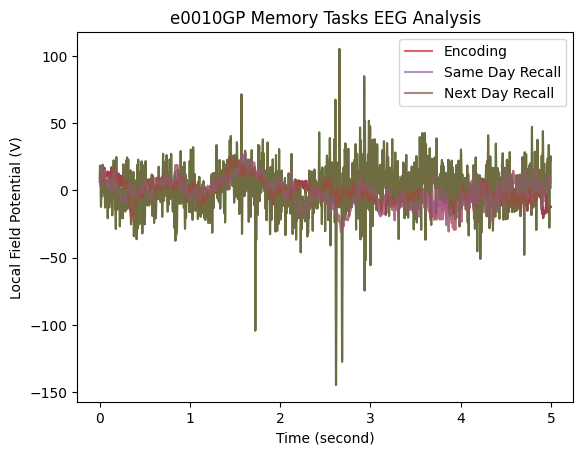

(6750, 5120)
(3375, 5120)
(5400, 5120)


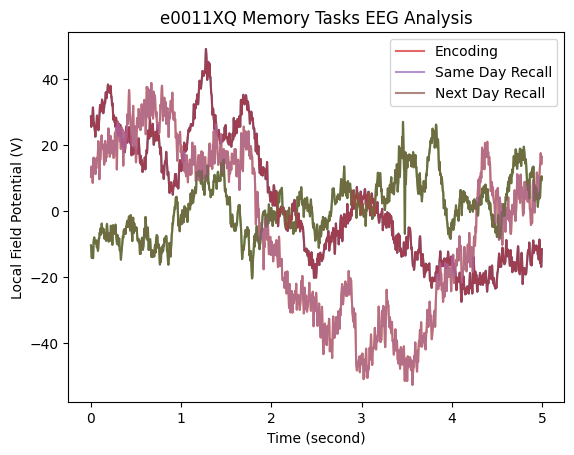

(11430, 5120)
(11430, 5120)
(9144, 5120)


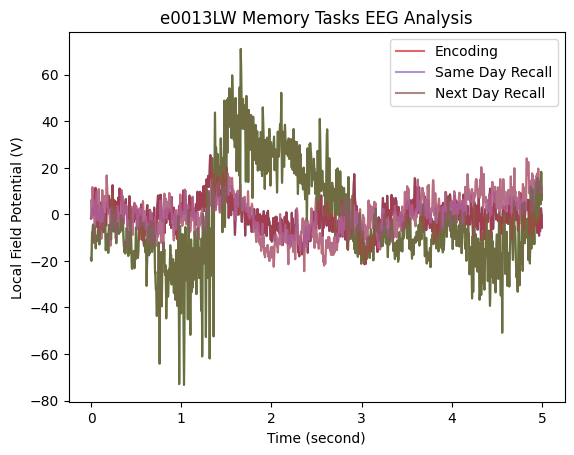

(4860, 5120)
(4860, 5120)
(0, 5120)


/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


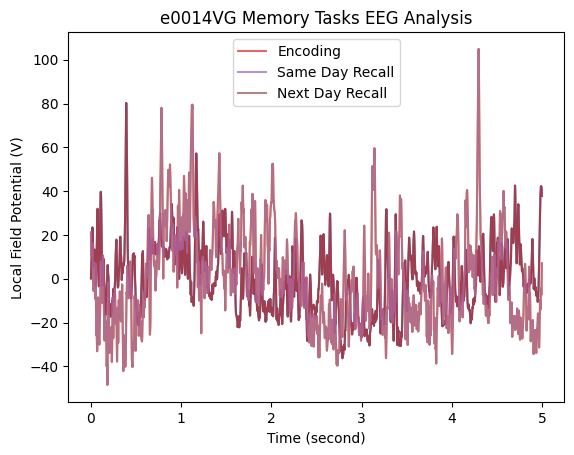

(4680, 5120)
(4680, 5120)
(3744, 5120)


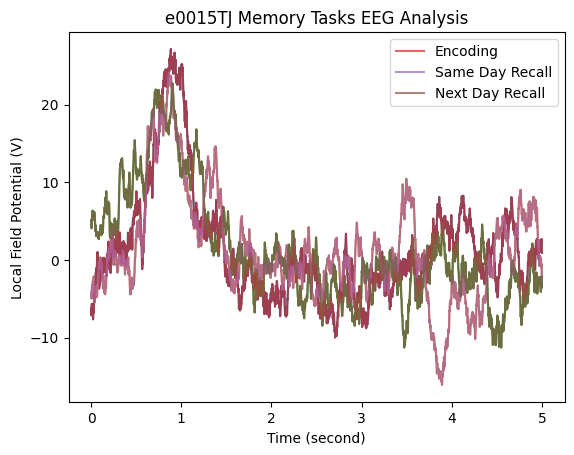

(5278, 5120)
(2912, 5120)
(0, 5120)


/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


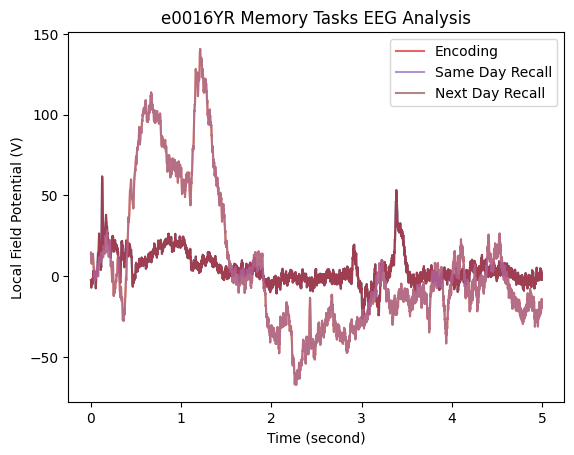

(7020, 5120)
(7020, 5120)
(5616, 5120)


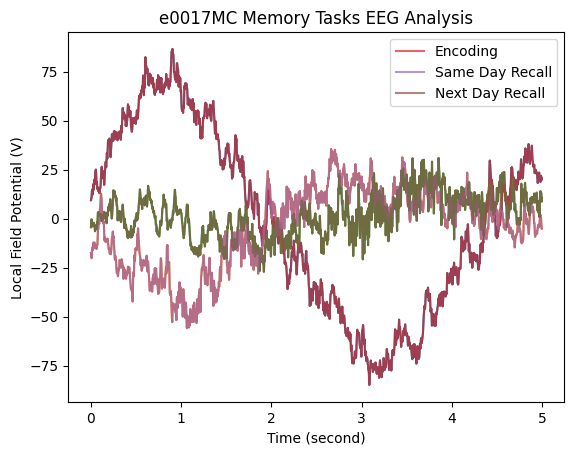

(5670, 5120)
(5670, 5120)
(4536, 5120)


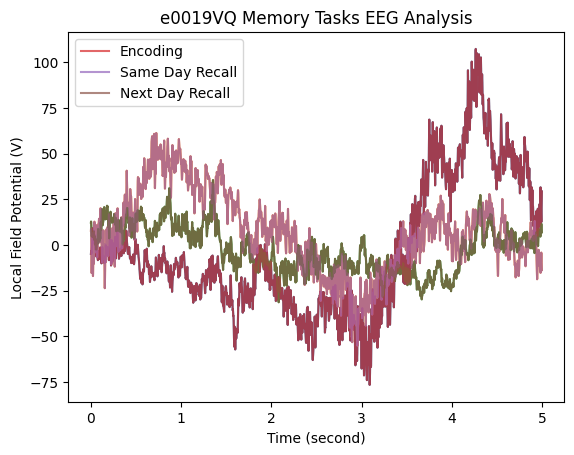

(7620, 5120)
(7620, 5120)
(6096, 5120)


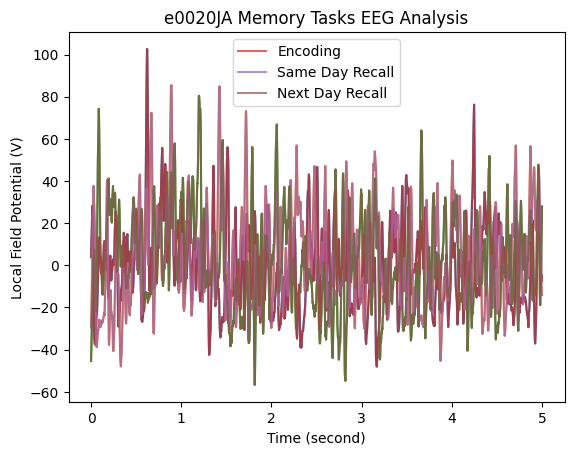

/tmp/ipykernel_1792706/299496455.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)


(7590, 5120)
(7590, 5120)
(0, 5120)


/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/oscar/data/brainstorm-ws/venv/lib64/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


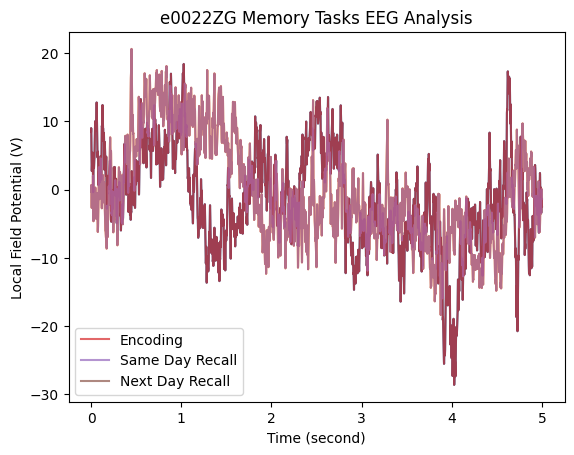

(7590, 5120)
(7590, 5120)
(6072, 5120)


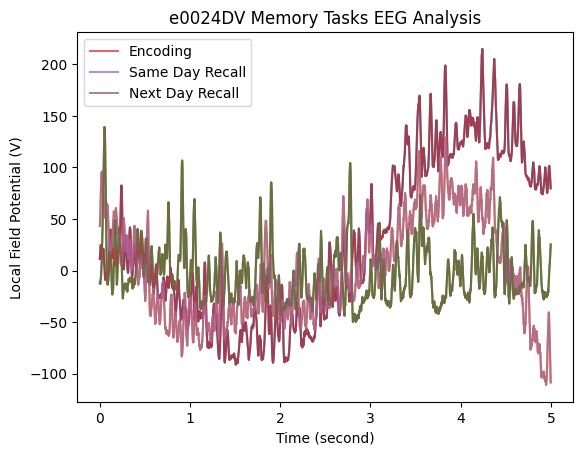

In [33]:
for i in files:
    filename= str(i)
    # Split the filename on slashes and get the last part
    last_part = filename.split('/')[-1]
    # Now split on underscore and get the first part
    participant_id = last_part.split('_')[0]
    df = pd.read_csv(i)
    plotMemroyTasksEEG(participant_id,df)

In [20]:
def plotFreqTime_AveragesEEG(df,phase,condition=None):
    if condition !=None:
        filtered_rows = df[(df["Phase"] == phase) & (df["Condition"] == condition)]
    else:
        filtered_rows = df[(df["Phase"] == phase)]
    timeseries_matrix = filtered_rows.loc[:, 'Time0000':].values
    print(timeseries_matrix.shape)
    timeseries_numpy_array =np.array(timeseries_matrix)
    average_seeg = np.mean(timeseries_numpy_array,axis =0)
    n_times = len(average_seeg)         # number of time samples per trial
    samp_freq = 1024       # sampling frequency in Hz

    # find spectral events
    # set parameters
    freqs = list(range(1, 60 + 1))   # fequency values (Hz) over which to calculate TFR
    times = np.arange(n_times) / samp_freq  # seconds
    event_band = [5, 50]  # low gamma band (Hz)
    thresh_FOM = 6.0  # factor-of-the-median threshold
    
    # calculate TFR
    tfrs = se.tfr(average_seeg, freqs, samp_freq)
    spec_events = se.find_events(tfr=tfrs, times=times, freqs=freqs,
                                 event_band=event_band, threshold_FOM=thresh_FOM)
    fig = se.plot_avg_spectrogram(tfr=tfrs, times=times, freqs=freqs,
                              event_band=event_band)
    return average_seeg

(4860, 5120)


array([ 0.13283694,  1.4546288 ,  2.47919611, ..., 40.62462699,
       39.42767617, 37.78768136])

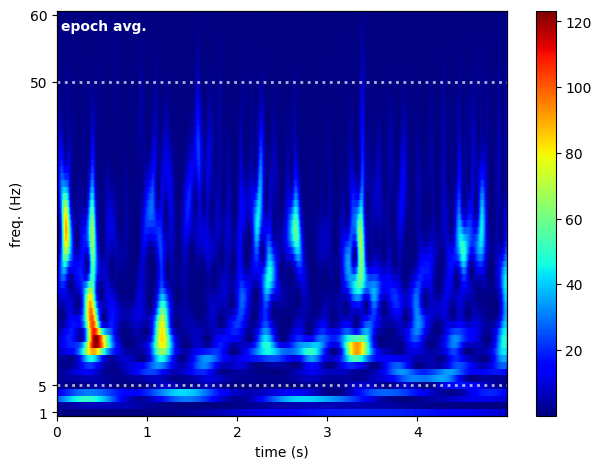

In [27]:
plotFreqTime_AveragesEEG(df,"Encoding")

In [34]:
def plotThreePhases_FreqTime_AverageEEG(participant_id,df, condition=None):
    phases = ["Encoding", "SameDayRecall", "NextDayRecall"]

    for phase in phases:
        if condition is not None:
            filtered_rows = df[(df["Phase"] == phase) & (df["Condition"] == condition)]
        else:
            filtered_rows = df[df["Phase"] == phase]
        if filtered_rows.shape[0] ==0:
             print("No Data")
        else:
       
            timeseries_matrix = filtered_rows.loc[:, 'Time0000':].values
            timeseries_numpy_array = np.array(timeseries_matrix)
            average_seeg = np.mean(timeseries_numpy_array, axis=0)
            n_times = len(average_seeg)  # number of time samples per trial
            samp_freq = 1024  # sampling frequency in Hz
    
            # find spectral events
            # set parameters
            freqs = list(range(1, 60 + 1))  # frequency values (Hz) over which to calculate TFR
            times = np.arange(n_times) / samp_freq  # seconds
            event_band = [5, 50]  # low gamma band (Hz)
            thresh_FOM = 6.0  # factor-of-the-median threshold
    
            # calculate TFR
            tfrs = se.tfr(average_seeg, freqs, samp_freq)
            spec_events = se.find_events(tfr=tfrs, times=times, freqs=freqs,
                                         event_band=event_band, threshold_FOM=thresh_FOM)
         
            # Plotting the average spectrogram for each phase
            fig = se.plot_avg_spectrogram(tfr=tfrs, times=times, freqs=freqs,
                                          event_band=event_band, spec_events=spec_events)
            fig.suptitle( participant_id+ " "+phase, x=0.5, y=1.05, horizontalalignment='center', verticalalignment='top')
    
            plt.show()

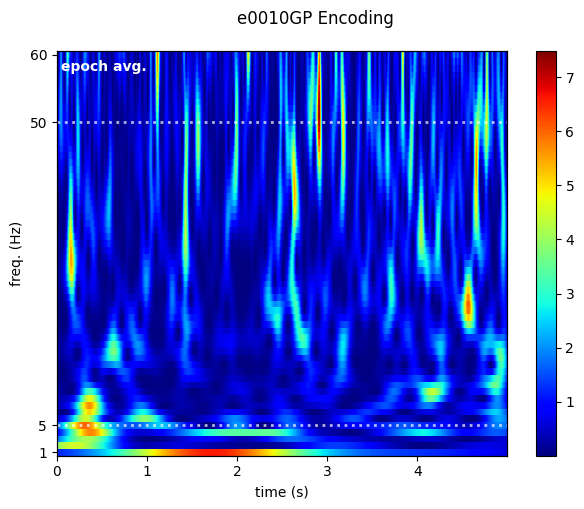

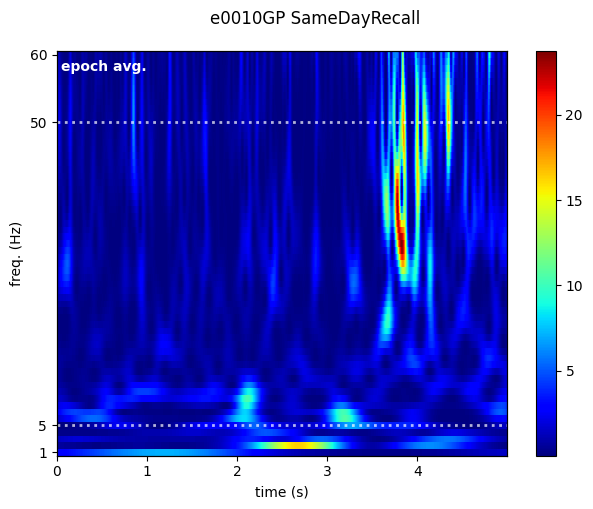

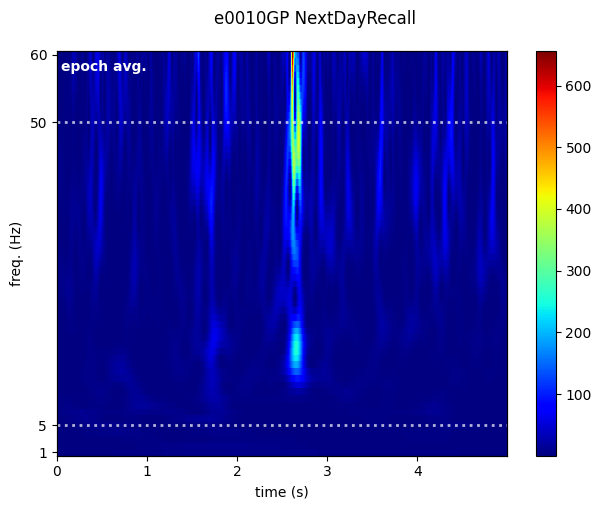

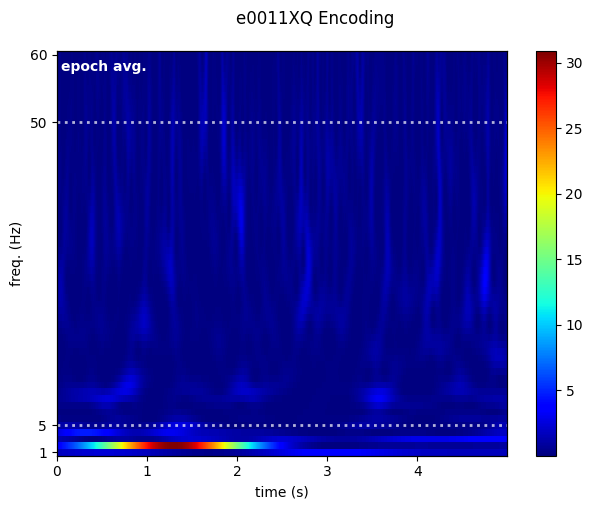

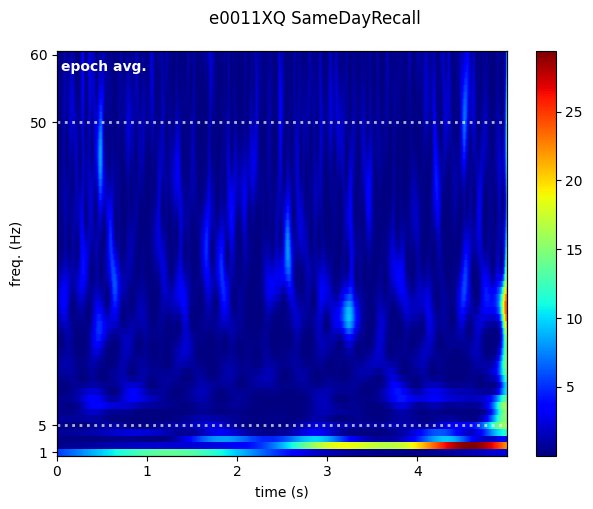

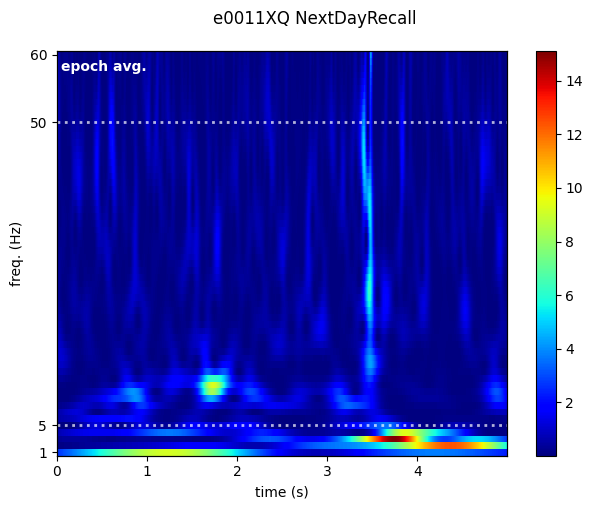

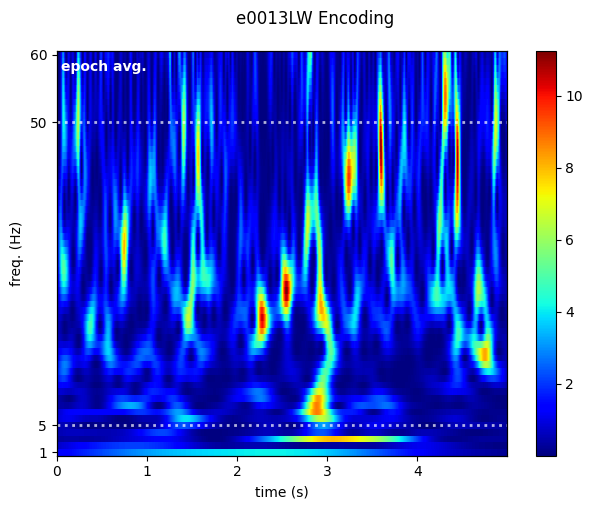

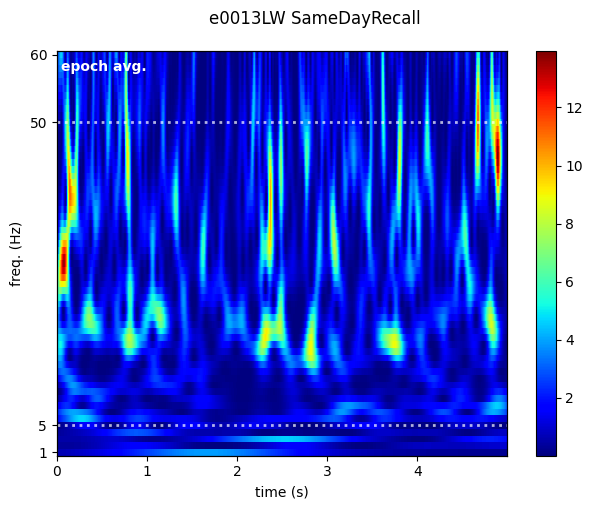

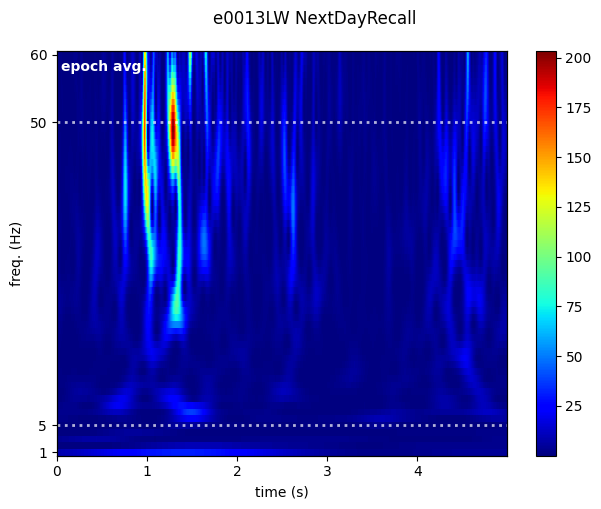

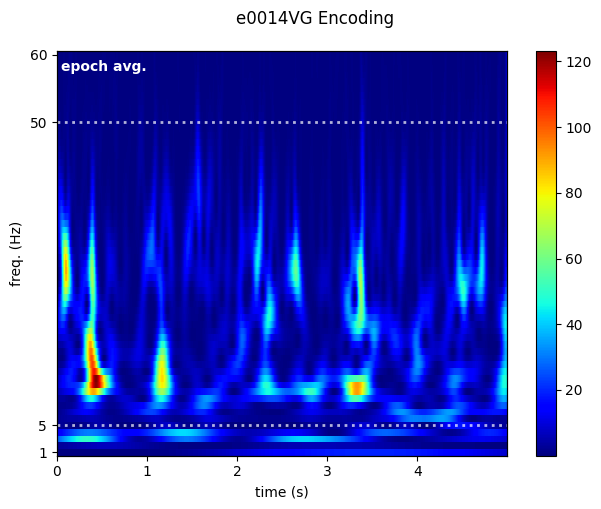

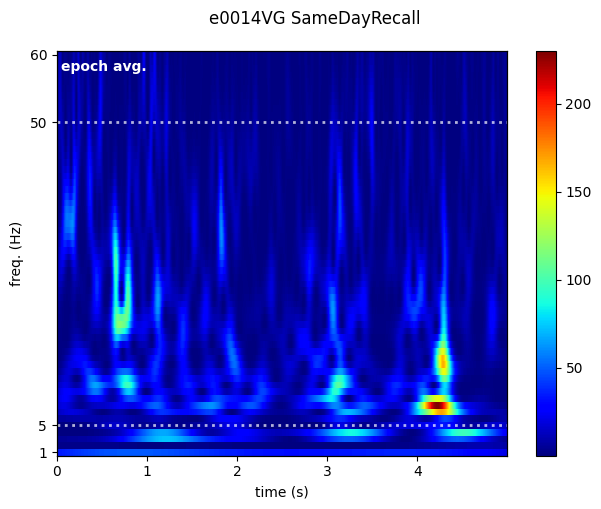

No Data


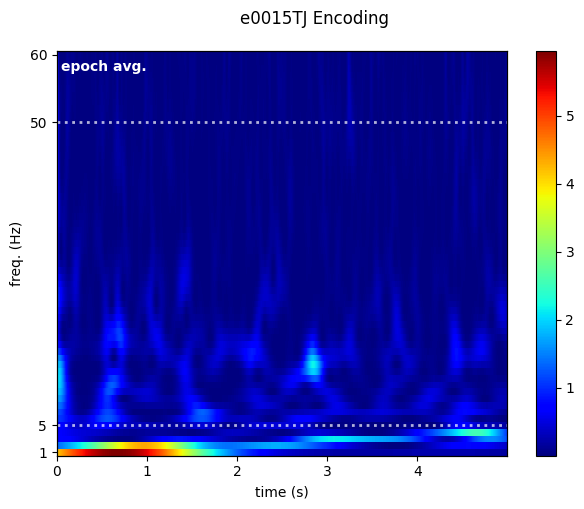

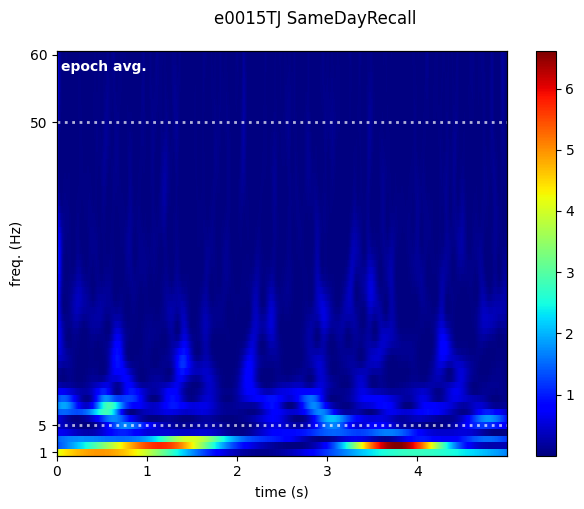

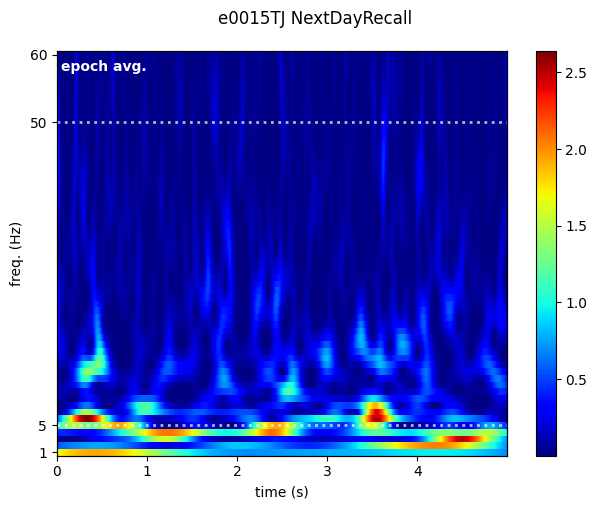

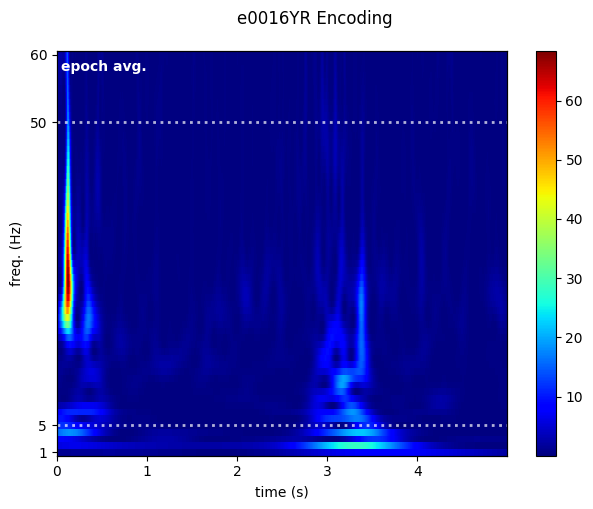

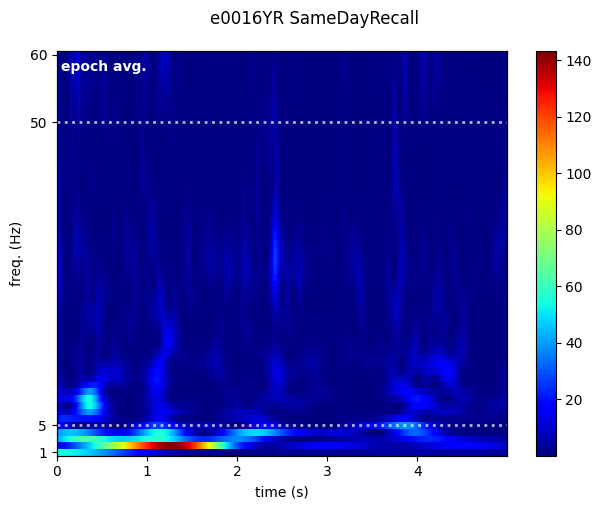

No Data


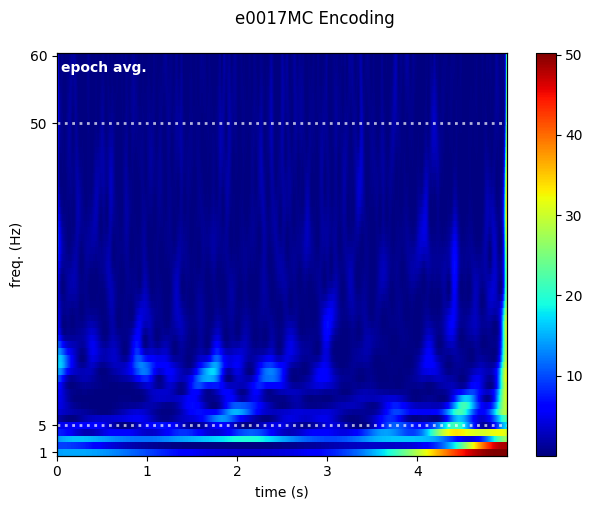

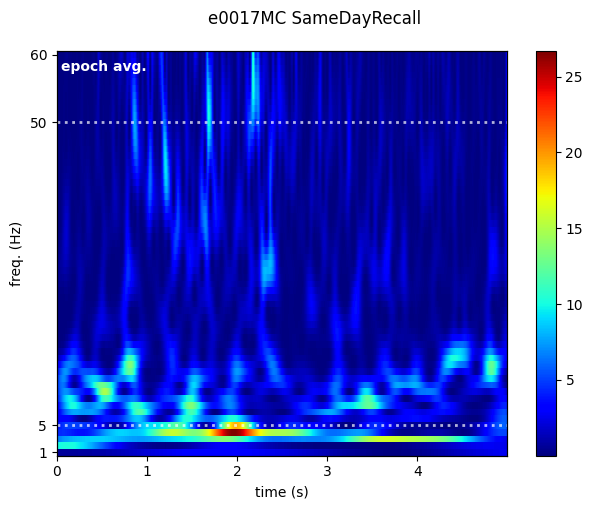

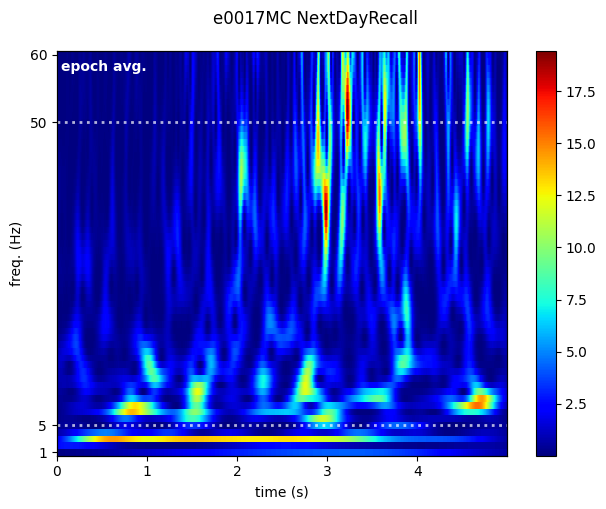

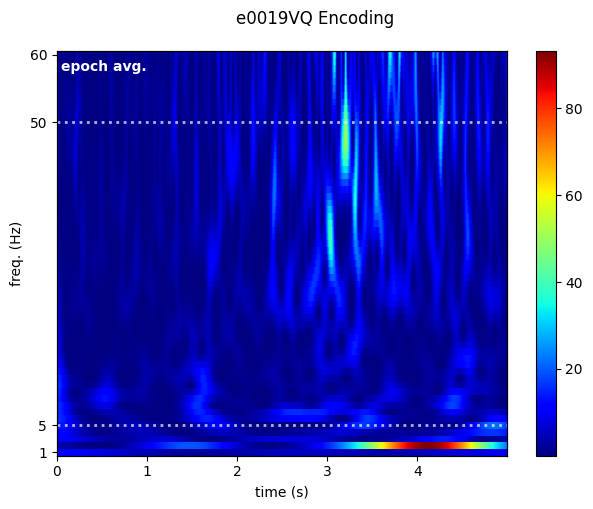

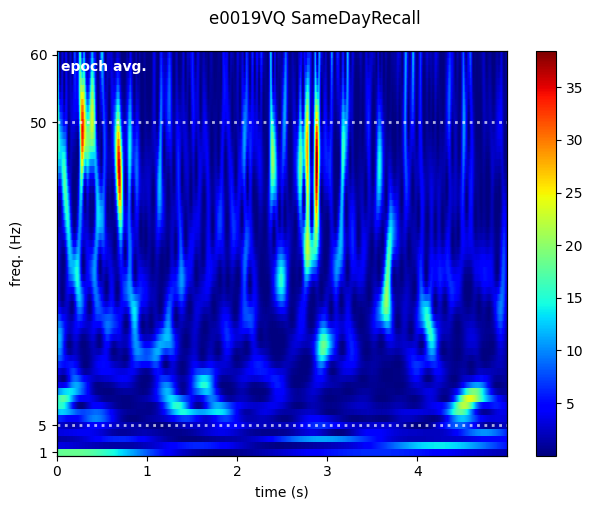

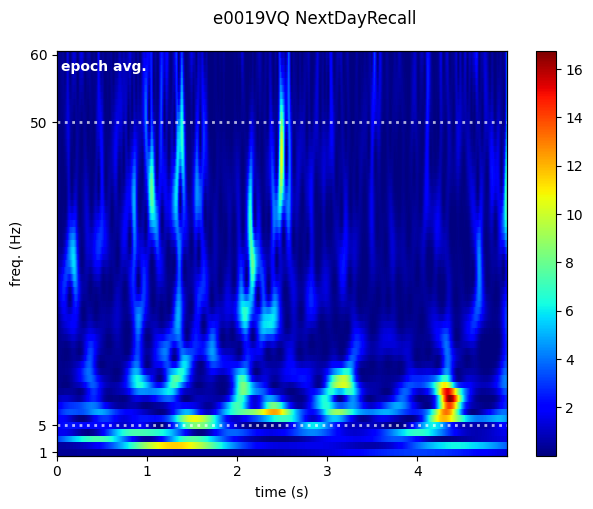

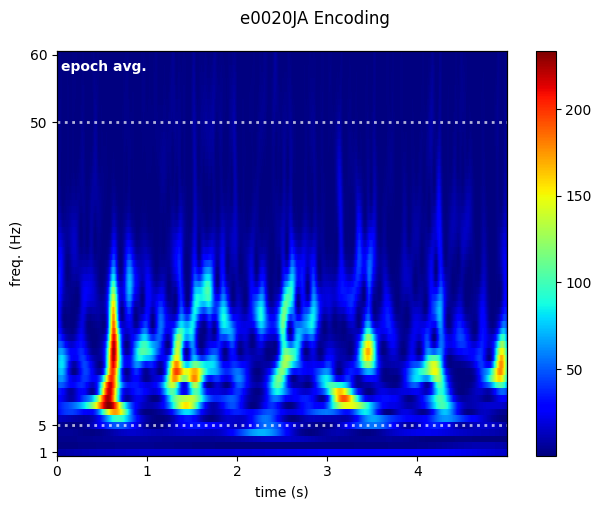

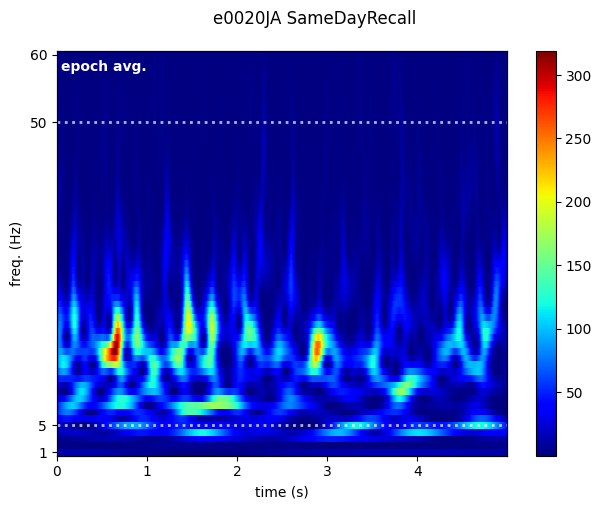

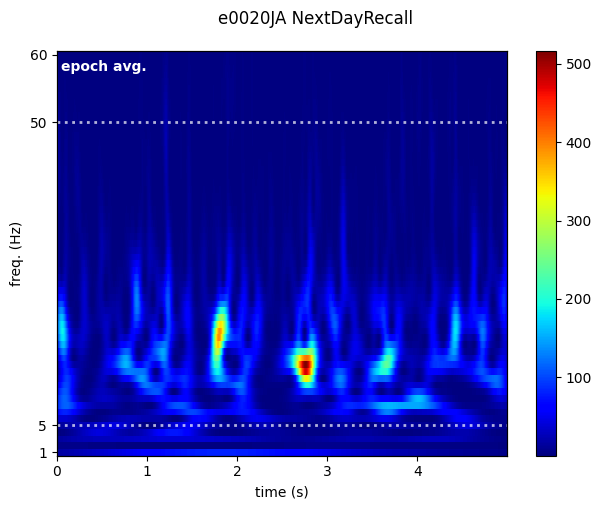

/tmp/ipykernel_1863747/3470582041.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(i)


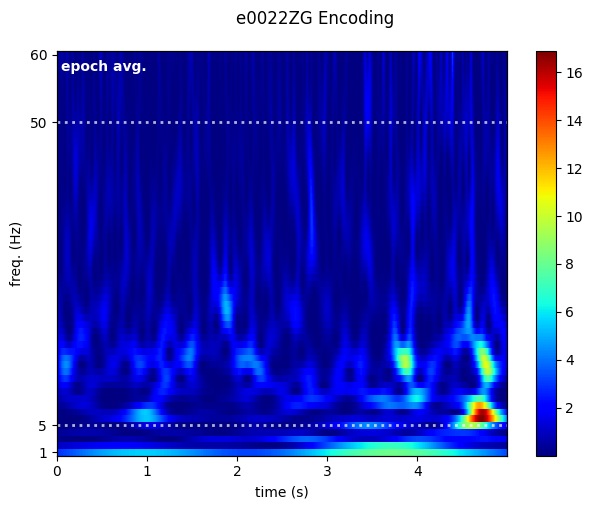

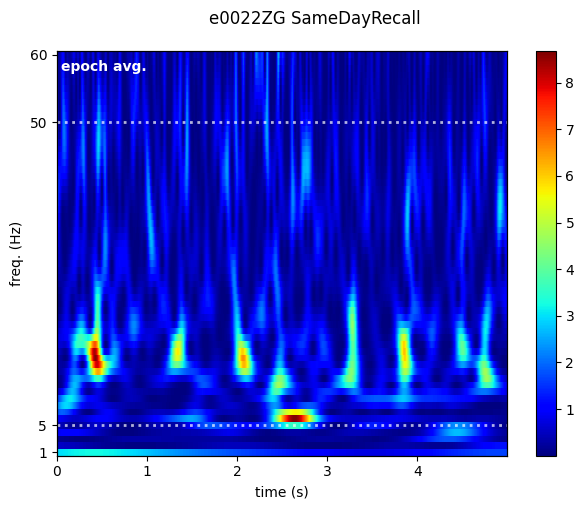

No Data


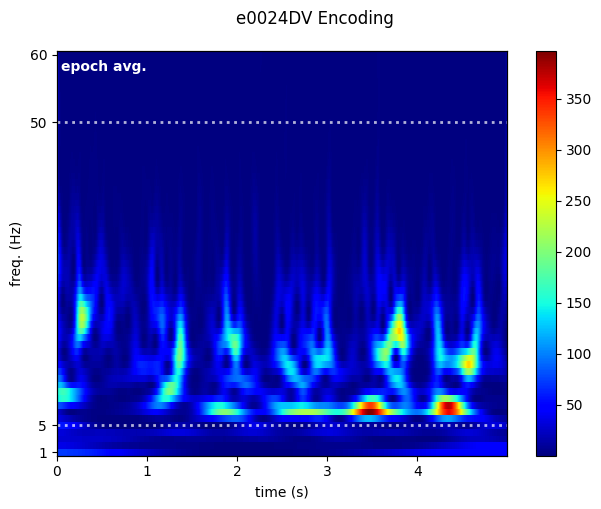

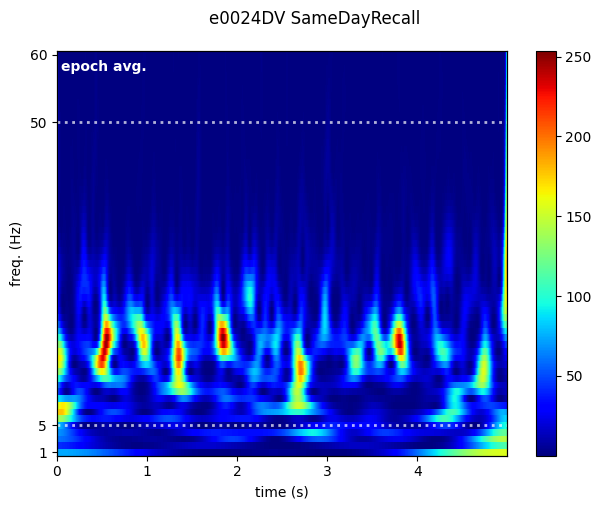

In [ ]:
for i in files:
    filename= str(i)
    # Split the filename on slashes and get the last part
    last_part = filename.split('/')[-1]
    # Now split on underscore and get the first part
    participant_id = last_part.split('_')[0]
    df = pd.read_csv(i)
    # Fill NaN values with the mean of each column
    
 
    plotThreePhases_FreqTime_AverageEEG(participant_id,df)